#Fully Connected Neural Networks

This notebook gives an introduction to training fully connected neural networks in PyTorch.

###The Perceptron

We first start with the very basic perceptron, which is a single neuron from an artificial neural network, and has the form

$$f(x) = \sigma(x\cdot \omega + b),$$

where $x\in \mathbb{R}^d$ is the input, $\omega\in \mathbb{R}^d$ is the weight, and $b\in \mathbb{R}$ is the bias. The parameters $\omega$ and $b$ are tunable. The function $\sigma$ is the activation function. Here, we use the Sigmoid activation function

$$\sigma(t) =  \frac{1}{1 + e^{-t}}.$$

A plot of the Sigmoid activation is shown below.

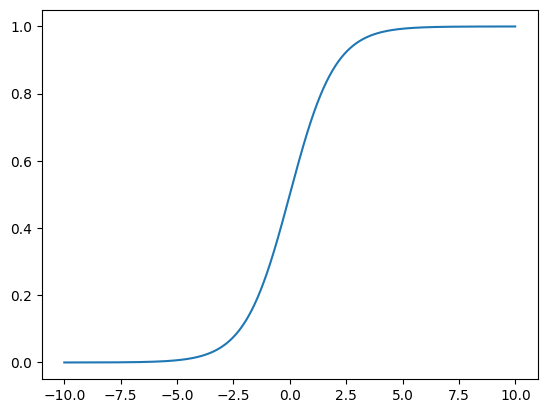

In [2]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(-10,10,0.01)
sigma = 1/(1 + np.exp(-t))
plt.plot(t,sigma)

To test out the perceptron, we'll need some synthetic data to test it on. We'll construct the dataset in numpy and then convert to torch.

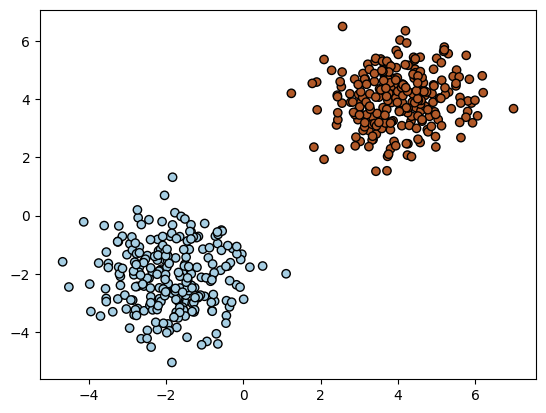

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch

num_pts = 500 #Total number of points
d = 2 #We are in dimension 2
m = int(num_pts/2) #Number in each class
data = np.random.randn(m,2) - [2,2]
data = np.vstack((data,np.random.randn(m,2) + [4,4]))
target = np.hstack((np.zeros((m,)),np.ones((m,))))

#Scatter plot the points colored by class
plt.scatter(data[:,0],data[:,1],c=target, cmap=plt.cm.Paired,edgecolors='black')
plt.savefig('clusters.eps')

#Convert to torch
data = torch.from_numpy(data).float()
target = torch.from_numpy(target)

Now let's train a perceptron classifier on this synthetic data.

In [4]:
import torch
import torch.optim as optim
import torch.nn.functional as F

# Create random Tensors for weight and bias
w = torch.randn(d, requires_grad=True)
b = torch.randn(1, requires_grad=True)

#Use an optimizer so we can avoid explicitly coding gradient descent.
#Need to provide a list of the parameters to be optimized over and the learning rate.
optimizer = optim.Adam([w,b], lr=1)  #Learning rate

for i in range(500):
    #Set the gradients to zero (in place of a.grad = None, etc.)
    optimizer.zero_grad()

    # Forward pass: compute predicted y using operations on Tensors (data@w is matrix/vector multiplication)
    output = torch.sigmoid(data@w + b)

    # Compute the loss using operations on Tensors.
    #loss = (output - target).pow(2).sum()
    loss = torch.sum((output - target)**2)

    #Print iteration and loss
    print('Iter:%d, Loss:%.4f'%(i,loss.item()))

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    loss.backward()

    #Take a step of gradient descent
    optimizer.step()

Iter:0, Loss:478.4336
Iter:1, Loss:270.4280
Iter:2, Loss:9.7572
Iter:3, Loss:0.0202
Iter:4, Loss:0.0011
Iter:5, Loss:0.0003
Iter:6, Loss:0.0001
Iter:7, Loss:0.0000
Iter:8, Loss:0.0000
Iter:9, Loss:0.0000
Iter:10, Loss:0.0000
Iter:11, Loss:0.0000
Iter:12, Loss:0.0000
Iter:13, Loss:0.0000
Iter:14, Loss:0.0000
Iter:15, Loss:0.0000
Iter:16, Loss:0.0000
Iter:17, Loss:0.0000
Iter:18, Loss:0.0000
Iter:19, Loss:0.0000
Iter:20, Loss:0.0000
Iter:21, Loss:0.0000
Iter:22, Loss:0.0000
Iter:23, Loss:0.0000
Iter:24, Loss:0.0000
Iter:25, Loss:0.0000
Iter:26, Loss:0.0000
Iter:27, Loss:0.0000
Iter:28, Loss:0.0000
Iter:29, Loss:0.0000
Iter:30, Loss:0.0000
Iter:31, Loss:0.0000
Iter:32, Loss:0.0000
Iter:33, Loss:0.0000
Iter:34, Loss:0.0000
Iter:35, Loss:0.0000
Iter:36, Loss:0.0000
Iter:37, Loss:0.0000
Iter:38, Loss:0.0000
Iter:39, Loss:0.0000
Iter:40, Loss:0.0000
Iter:41, Loss:0.0000
Iter:42, Loss:0.0000
Iter:43, Loss:0.0000
Iter:44, Loss:0.0000
Iter:45, Loss:0.0000
Iter:46, Loss:0.0000
Iter:47, Loss:0.000

The loss measures roughly how many points are misclassified. Let's plot the points and decision boundary to see how the classifier performed.

[7.0624332 7.7496653]
[-6.4534345]


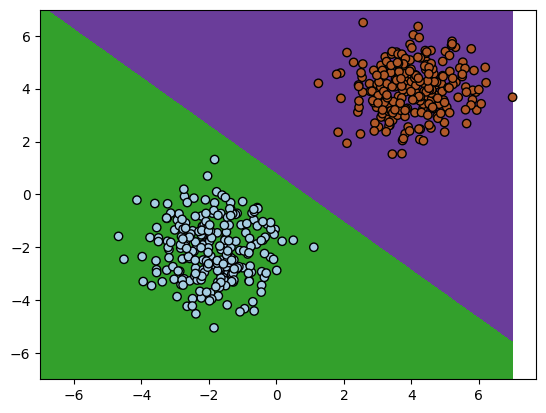

In [5]:
#Plotting a decision boundary
X,Y = np.mgrid[-7:7:0.01,-7:7:0.01]
points = np.c_[X.ravel(),Y.ravel()]

#Detach from autograd and convert back to numpy
w_npy = w.detach().numpy()
b_npy = b.detach().numpy()
data_npy = data.numpy()

#Predict class using model
y = data_npy@w_npy + b_npy > 0
z = points@w_npy + b_npy > 0

plt.figure()
plt.scatter(data_npy[:,0],data_npy[:,1],zorder=2,c=y,cmap=plt.cm.Paired,edgecolors='black')
C = plt.contourf(X, Y, z.reshape(X.shape), cmap=plt.cm.Paired,zorder=1)
plt.savefig('clusters_classified.eps')
print(w_npy)
print(b_npy)

###Toy classification problem

We now consider a simple toy classification problem with two classes concentrated on rings. Here, we use a 2 layer neural network with 100 hidden nodes, and the cross-entropy loss.

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

#Our neural network as 2 layers with 100 hidden nodes
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2,1000) #include weights & bias
        self.fc2 = nn.Linear(1000,2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

Let's draw our training data and plot.

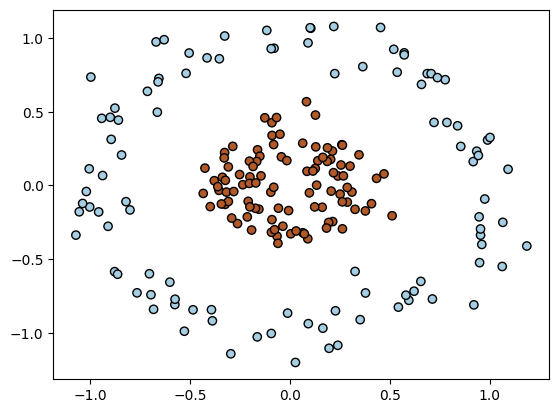

In [8]:
#Training data on circles
x,y = datasets.make_circles(n_samples=200,noise=0.1,factor=0.3)
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.Paired,edgecolors='black')
plt.savefig('tworings.eps')

Now we train our neural network.

Iter:0
Iter:10
Iter:20
Iter:30
Iter:40
Iter:50
Iter:60
Iter:70
Iter:80
Iter:90
Iter:100
Iter:110
Iter:120
Iter:130
Iter:140
Iter:150
Iter:160
Iter:170
Iter:180
Iter:190


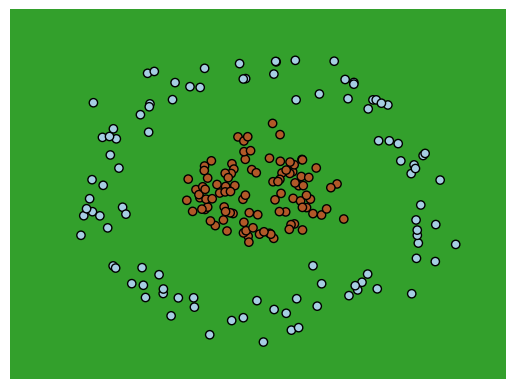

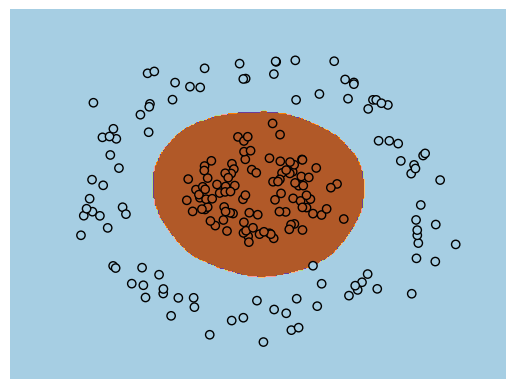

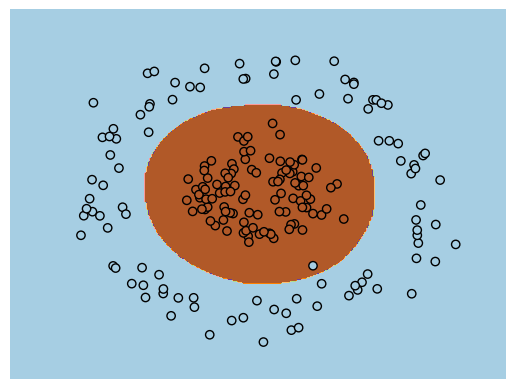

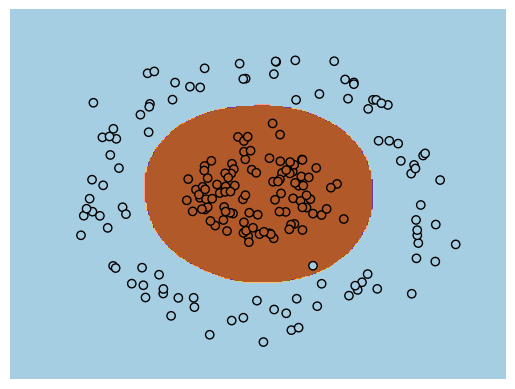

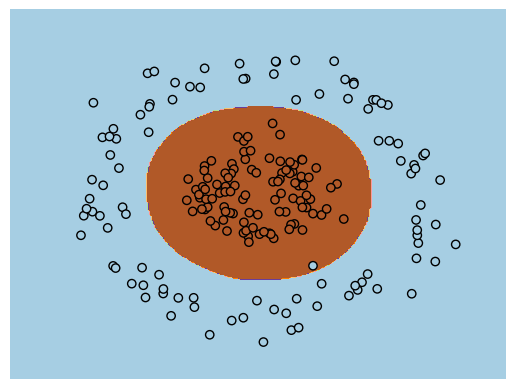

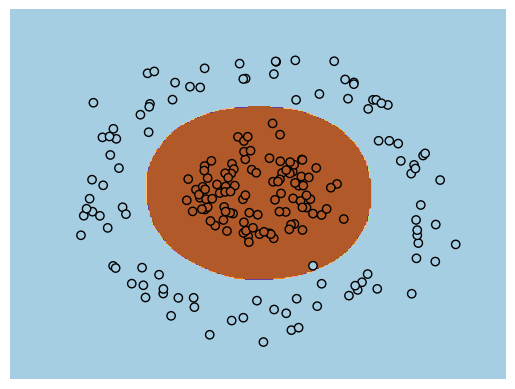

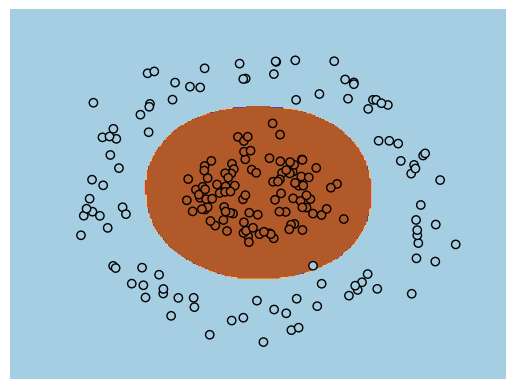

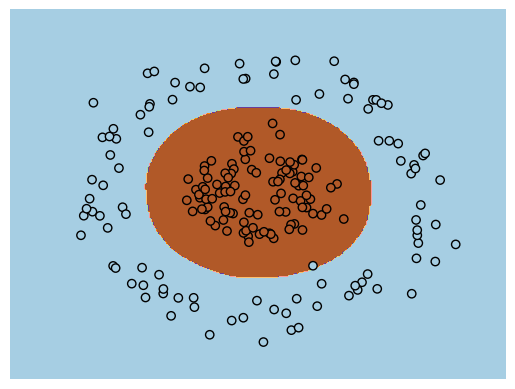

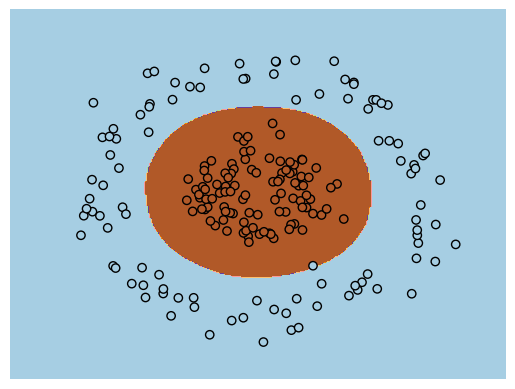

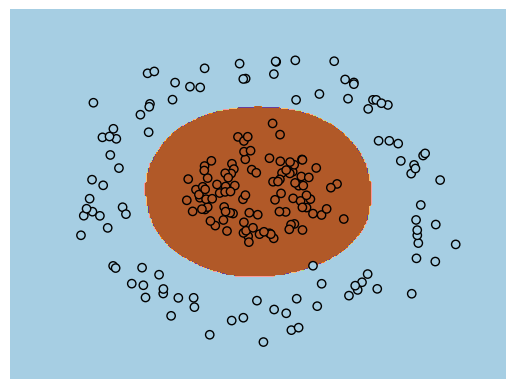

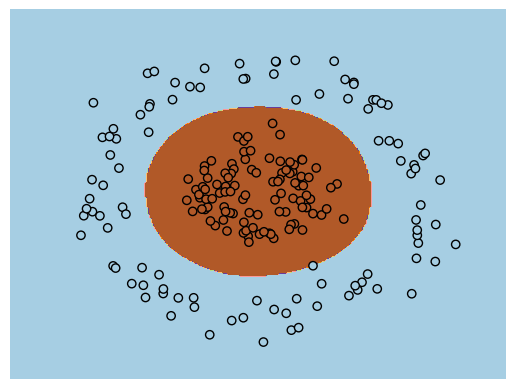

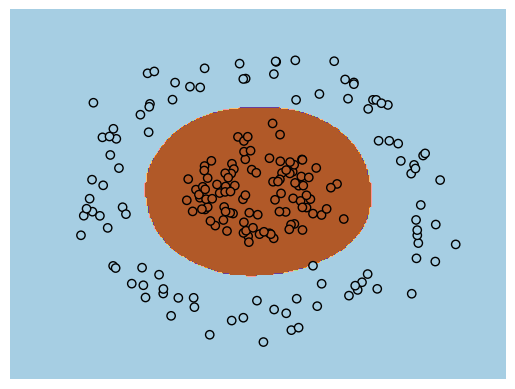

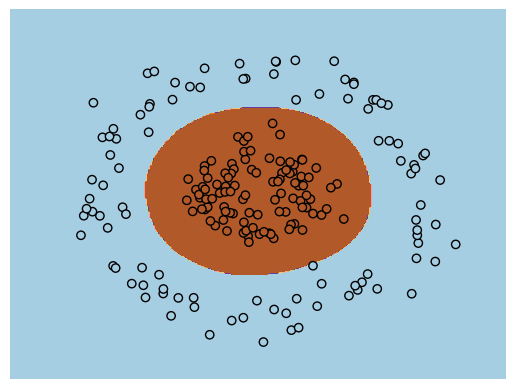

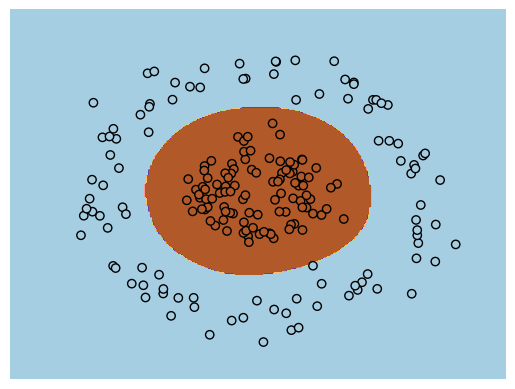

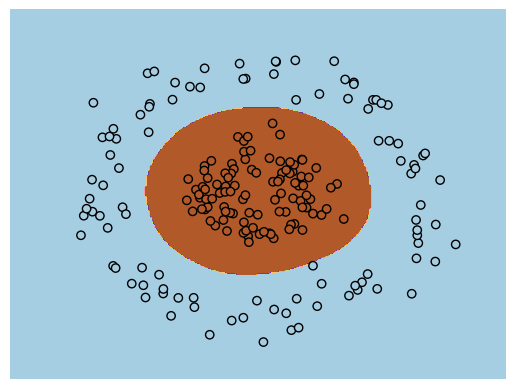

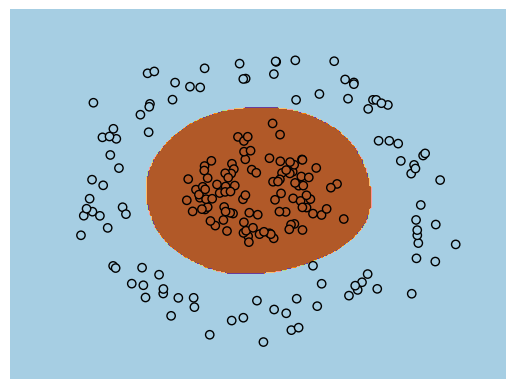

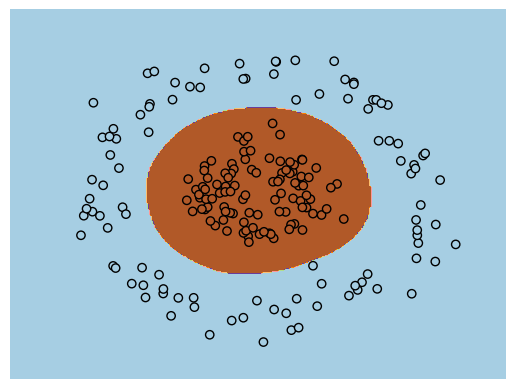

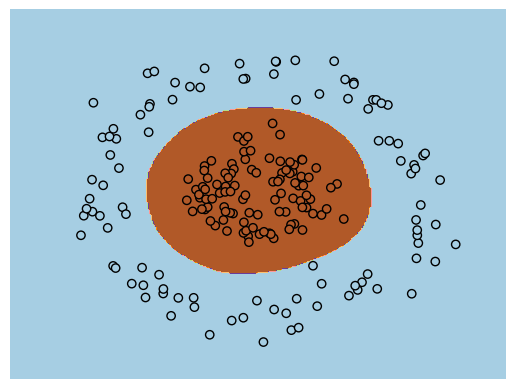

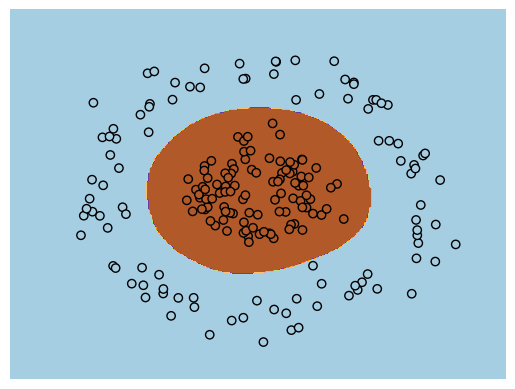

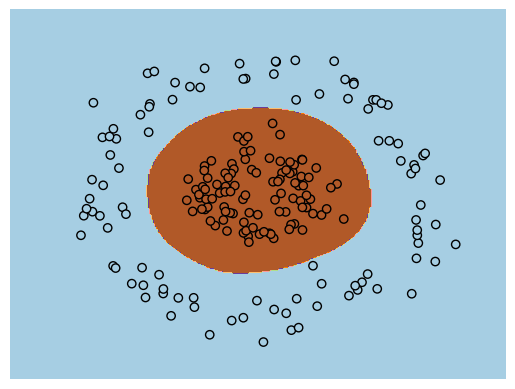

In [9]:
#Convert to torch
data = torch.from_numpy(x).float()
target = torch.from_numpy(y)

#Setup model
model = Net()
optimizer = optim.Adam(model.parameters(), lr=0.001)  #Learning rate

#Precompute for plotting
X,Y = np.mgrid[-1.5:1.5:0.01,-1.5:1.5:0.01]
points = torch.from_numpy(np.c_[X.ravel(),Y.ravel()]).float()

#Training
for i in range(200):
    if i % 10 == 0:
        print('Iter:%d'%i)
        model.eval()
        #Plot the classification decision boundary
        with torch.no_grad(): #Tell torch to stop keeping track of gradients
            plt.figure()
            plt.scatter(x[:,0],x[:,1],zorder=2,c=y,cmap=plt.cm.Paired,edgecolors='black')
            plt.axis('off')
            Z = np.argmax(model(points).numpy(),axis=1).reshape(X.shape)
            C = plt.contourf(X, Y, Z, cmap=plt.cm.Paired,zorder=1)

    #Training mode, run data through neural network
    model.train()
    optimizer.zero_grad()
    loss = F.nll_loss(model(data), target)

    #Back propagation to compute all gradients, and a single gradient descent step
    loss.backward()
    optimizer.step()

#Save our neural network model so we can load again later
torch.save(model.state_dict(), "ring_classify.pt")

##Application to MNIST digit classification

Our last example is to the classification of MNIST digits. While Torch offers access to MNIST and other datasets, we'll use GraphLearning for now.


In [10]:
!pip install -q graphlearning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 7.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


Let's first load MNIST and display some images.

(70000, 784)


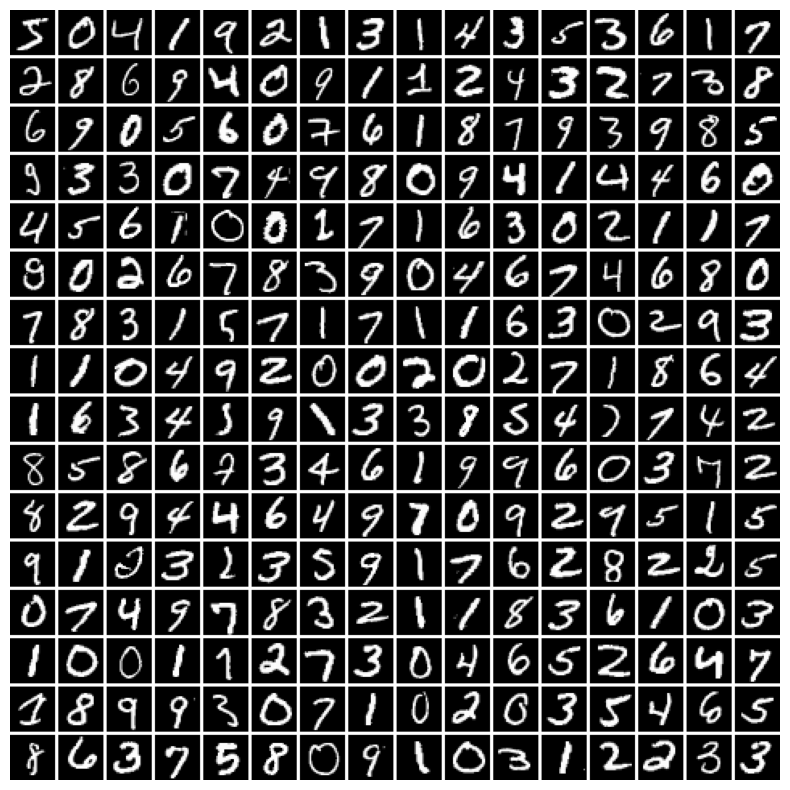

In [11]:
import graphlearning as gl

#Load MNIST data
x,y = gl.datasets.load('mnist',metric='raw')

#Display images
gl.utils.image_grid(x,n_rows=16,n_cols=16)
print(x.shape)

We use a two layer neural network with 32 hidden nodes. The code below defines the network architecture.

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

#Our neural network as 2 layers with 32 hidden nodes
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784,32)
        self.fc2 = nn.Linear(32,10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

We now train the neural network with gradient descent.

In [13]:
#Training and testing data, converted to torch
train_size = 60000
data = torch.from_numpy(x[:train_size,:]).float()
target = torch.from_numpy(y[:train_size]).long()
data_test = torch.from_numpy(x[train_size:,:]).float()
target_test = torch.from_numpy(y[train_size:]).long()

#Setup model
model = Net()
optimizer = optim.Adam(model.parameters(), lr=0.1)  #Learning rate

#Training
for i in range(1000):

    #Training mode, run data through neural network
    model.train()
    optimizer.zero_grad()
    loss = F.nll_loss(model(data), target)

    #Back propagation to compute all gradients, and a single gradient descent step
    loss.backward()
    optimizer.step()

    #Accuracy
    model.eval()
    with torch.no_grad():
        test_pred = torch.argmax(model(data_test),axis=1)
        test_accuracy = torch.mean((test_pred == target_test).float())
        train_pred = torch.argmax(model(data),axis=1)
        train_accuracy = torch.mean((train_pred == target).float())
        print('Iter:%d, Test Accuracy=%.2f, Training Accuracy=%.2f'%(i,test_accuracy*100,train_accuracy*100))

#Save our neural network model so we can load again later
torch.save(model.state_dict(), "mnist_classify.pt")

Iter:0, Test Accuracy=35.31, Training Accuracy=35.44
Iter:1, Test Accuracy=31.55, Training Accuracy=30.56
Iter:2, Test Accuracy=38.67, Training Accuracy=38.10
Iter:3, Test Accuracy=51.69, Training Accuracy=51.79
Iter:4, Test Accuracy=41.66, Training Accuracy=41.33
Iter:5, Test Accuracy=47.58, Training Accuracy=47.24
Iter:6, Test Accuracy=48.15, Training Accuracy=47.65
Iter:7, Test Accuracy=45.13, Training Accuracy=44.92
Iter:8, Test Accuracy=48.96, Training Accuracy=49.45
Iter:9, Test Accuracy=50.47, Training Accuracy=51.28
Iter:10, Test Accuracy=52.08, Training Accuracy=52.39
Iter:11, Test Accuracy=53.64, Training Accuracy=54.14
Iter:12, Test Accuracy=55.88, Training Accuracy=56.39
Iter:13, Test Accuracy=57.14, Training Accuracy=57.65
Iter:14, Test Accuracy=56.53, Training Accuracy=57.32
Iter:15, Test Accuracy=61.43, Training Accuracy=61.49
Iter:16, Test Accuracy=61.18, Training Accuracy=61.38
Iter:17, Test Accuracy=60.36, Training Accuracy=60.15
Iter:18, Test Accuracy=66.65, Training

##Exercises
1. Try reducing the train size and see if you can get the network to overfit (which means the training accuracy is much larger than the testing accuracy).
2. Try changing the number of hidden nodes, and the number of layers in the network. How is the accuracy affected?
3. Pick a new classification dataset publicly available online. For example, you can browse [Kaggle](https://www.kaggle.com/) for general data science datasets, [Torch Datasets](https://pytorch.org/vision/stable/datasets.html) for image classification problems, or [sklearn datasets](https://scikit-learn.org/stable/datasets.html). Train a neural network classifier on your new dataset. The code below will get you started with Kaggle.

In [25]:
#This sets up Kaggle to download directly to Google Colab (only needs to run once)
!mkdir -p ~/.kaggle
!wget https://www-users.math.umn.edu/~jwcalder/MCFAM/kaggle.json -P ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

--2025-07-15 15:27:45--  https://www-users.math.umn.edu/~jwcalder/MCFAM/kaggle.json
Resolving www-users.math.umn.edu (www-users.math.umn.edu)... 134.84.66.195
Connecting to www-users.math.umn.edu (www-users.math.umn.edu)|134.84.66.195|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www-users.cse.umn.edu/~jwcalder/MCFAM/kaggle.json [following]
--2025-07-15 15:27:45--  https://www-users.cse.umn.edu/~jwcalder/MCFAM/kaggle.json
Resolving www-users.cse.umn.edu (www-users.cse.umn.edu)... 134.84.66.195
Connecting to www-users.cse.umn.edu (www-users.cse.umn.edu)|134.84.66.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64 [application/json]
Saving to: ‘/root/.kaggle/kaggle.json.1’

kaggle.json.1       100%[===================>]      64  --.-KB/s    in 0s      

2025-07-15 15:27:46 (27.7 MB/s) - ‘/root/.kaggle/kaggle.json.1’ saved [64/64]



In [27]:
#As an example, we now download and unzip the Sign Language MNIST dataset from Kaggle
import zipfile

!kaggle datasets download -d datamunge/sign-language-mnist
with zipfile.ZipFile("sign-language-mnist.zip","r") as zip_ref:
    zip_ref.extractall(".")
!ls -l

Dataset URL: https://www.kaggle.com/datasets/datamunge/sign-language-mnist
License(s): CC0-1.0
sign-language-mnist.zip: Skipping, found more recently modified local copy (use --force to force download)
total 167980
-rw-r--r-- 1 root root   208007 Jul 15 15:27 american_sign_language.PNG
-rw-r--r-- 1 root root   487452 Jul 15 15:27 amer_sign2.png
-rw-r--r-- 1 root root    44527 Jul 15 15:27 amer_sign3.png
-rw-r--r-- 1 root root   310747 Jul 15 14:23 clusters_classified.eps
-rw-r--r-- 1 root root    71786 Jul 15 14:21 clusters.eps
drwxr-xr-x 2 root root     4096 Jul 15 15:11 data
-rw-r--r-- 1 root root   103880 Jul 15 15:10 mnist_classify.pt
-rw-r--r-- 1 root root    22080 Jul 15 14:58 ring_classify.pt
drwxr-xr-x 1 root root     4096 Jul 11 18:44 sample_data
-rw-r--r-- 1 root root 65633206 Sep 21  2019 sign-language-mnist.zip
drwxr-xr-x 2 root root     4096 Jul 15 15:10 sign_mnist_test
-rw-r--r-- 1 root root 21777485 Jul 15 15:27 sign_mnist_test.csv
drwxr-xr-x 2 root root     4096 Jul 15 

In [29]:
#Let's load the training data with pandas
import pandas as pd

df_train = pd.read_csv('sign_mnist_train.csv')
df_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


(27455, 784)
(7172, 784)


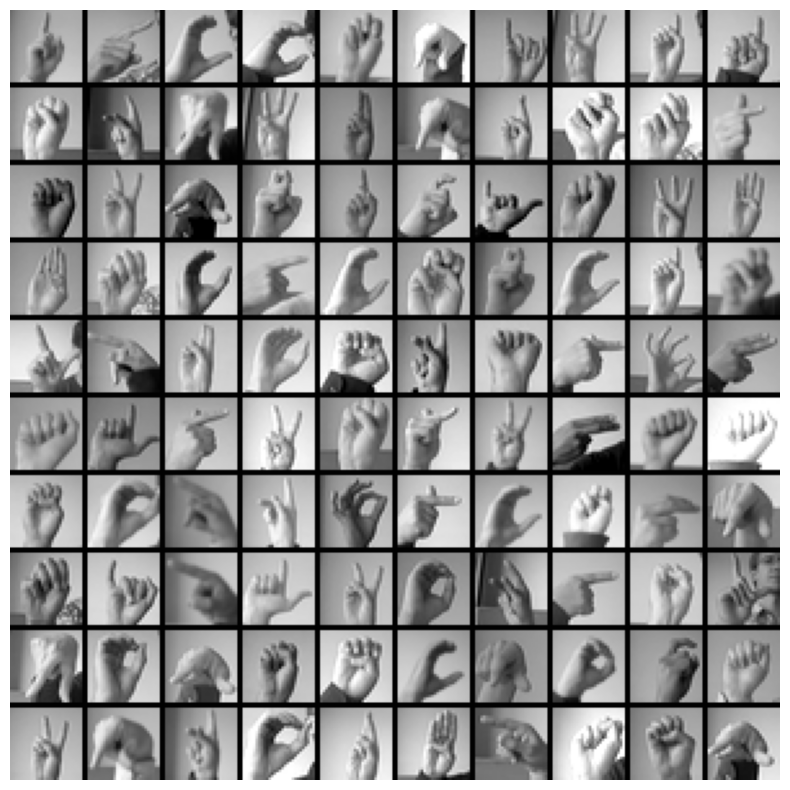

In [32]:
import graphlearning as gl
import torch
import numpy as np

#The first column is the label and the rest are the pixel values
df_train = pd.read_csv('sign_mnist_train.csv')
train_labels = df_train.values[:,0]
train_data = df_train.values[:,1:]

df_train = pd.read_csv('sign_mnist_test.csv')
test_labels = df_train.values[:,0]
test_data = df_train.values[:,1:]

print(train_data.shape)
print(test_data.shape)

#Display image grid with graphlearning
gl.utils.image_grid(train_data)

[3 6 2 ... 2 4 2]


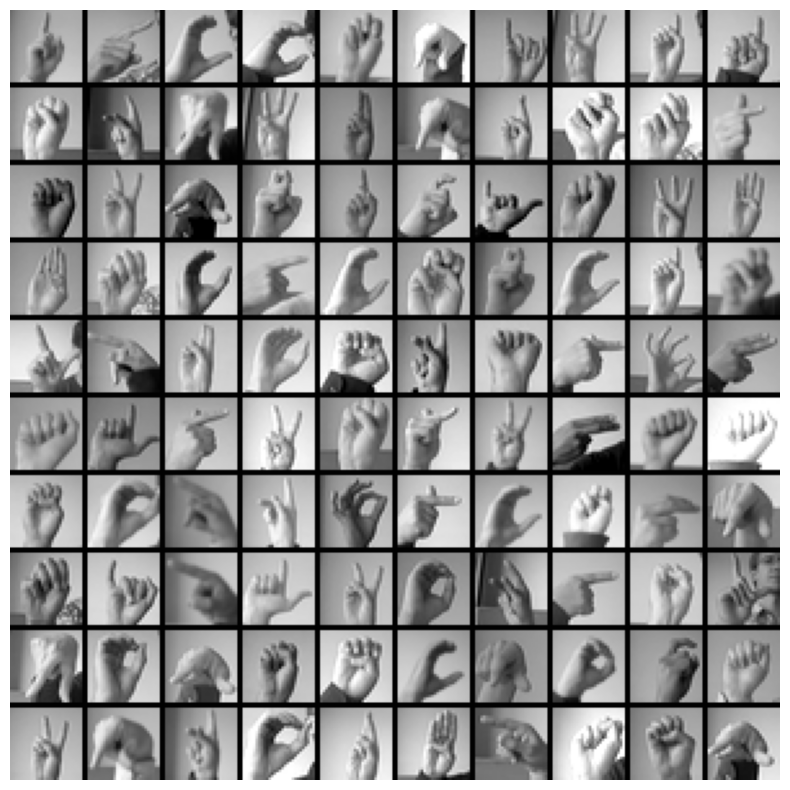

In [33]:
#Sign Language MNIST can also be loaded from the GraphLearning package
data,labels = gl.datasets.load('signmnist', metric = 'raw')

print(labels)
gl.utils.image_grid(train_data)

In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

#Our neural network as 2 layers with 128 hidden nodes
class SLNet(nn.Module):
    def __init__(self):
        super(SLNet, self).__init__()
        self.fc1 = nn.Linear(784,128)
        self.fc2 = nn.Linear(128,26) # 26 classes for Sign Language MNIST

    def forward(self, data):
        data = F.relu(self.fc1(data))
        data = self.fc2(data)
        output = F.log_softmax(data, dim=1)
        return output

# Training and testing data, converted to torch
train_size = 27000
data = torch.from_numpy(train_data[:train_size,:]).float()
target = torch.from_numpy(train_labels[:train_size]).long()
data_test = torch.from_numpy(test_data).float()
target_test = torch.from_numpy(test_labels).long()


#Setup model
model = SLNet()
optimizer = optim.Adam(model.parameters(), lr=0.1)  #Learning rate

#Training
for i in range(1000):

    #Training mode, run data through neural network
    model.train()
    optimizer.zero_grad()
    loss = F.nll_loss(model(data), target)

    #Back propagation to compute all gradients, and a single gradient descent step
    loss.backward()
    optimizer.step()

    #Accuracy
    model.eval()
    with torch.no_grad():
        test_pred = torch.argmax(model(data_test),axis=1)
        test_accuracy = torch.mean((test_pred == target_test).float())
        train_pred = torch.argmax(model(data),axis=1)
        train_accuracy = torch.mean((train_pred == target).float())
        print('Iter:%d, Test Accuracy=%.2f, Training Accuracy=%.2f'%(i,test_accuracy*100,train_accuracy*100))

#Save our neural network model so we can load again later
torch.save(model.state_dict(), "sign_lang_classify.pt")

Iter:0, Test Accuracy=4.84, Training Accuracy=3.98
Iter:1, Test Accuracy=3.43, Training Accuracy=4.36
Iter:2, Test Accuracy=4.02, Training Accuracy=4.28
Iter:3, Test Accuracy=3.42, Training Accuracy=4.36
Iter:4, Test Accuracy=4.82, Training Accuracy=3.93
Iter:5, Test Accuracy=6.08, Training Accuracy=3.67
Iter:6, Test Accuracy=5.49, Training Accuracy=3.83
Iter:7, Test Accuracy=3.46, Training Accuracy=4.31
Iter:8, Test Accuracy=4.62, Training Accuracy=4.09
Iter:9, Test Accuracy=4.62, Training Accuracy=4.06
Iter:10, Test Accuracy=4.85, Training Accuracy=3.98
Iter:11, Test Accuracy=4.85, Training Accuracy=3.98
Iter:12, Test Accuracy=4.85, Training Accuracy=3.98
Iter:13, Test Accuracy=3.72, Training Accuracy=4.23
Iter:14, Test Accuracy=3.72, Training Accuracy=4.23
Iter:15, Test Accuracy=2.87, Training Accuracy=4.48
Iter:16, Test Accuracy=2.87, Training Accuracy=4.48
Iter:17, Test Accuracy=2.87, Training Accuracy=4.48
Iter:18, Test Accuracy=2.87, Training Accuracy=4.48
Iter:19, Test Accuracy